# Getting Started with Keras!

*aka boring stuff first...*

In this tutorial we will demonstrate how to load a dataset, define a simple keras model and evaluate its performance!


Let's start by loading the data! Keras provides an easy to use interface for several datasets, so we will use it to load the well-known MNIST dataset.

In [1]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Train/test data shape:", x_train.shape, x_test.shape)
print("Train/test labels shape:", y_train.shape, y_test.shape)


Train/test data shape: (60000, 28, 28) (10000, 28, 28)
Train/test labels shape: (60000,) (10000,)


Verify that we indeed loaded the correct dataset :p

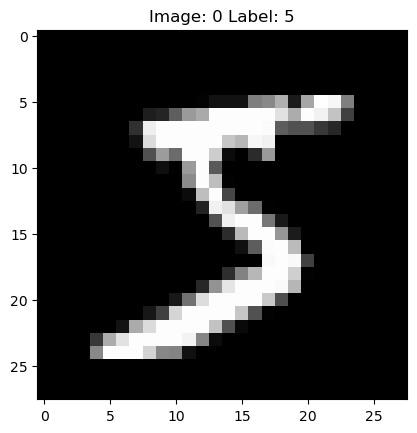

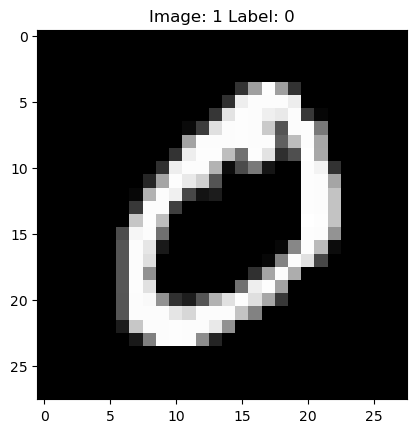

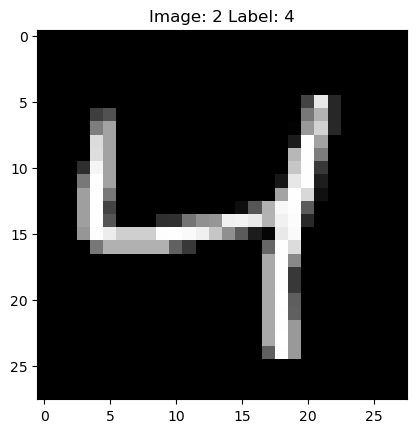

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

for i in range(3):
    plt.figure(i)
    plt.imshow(x_train[i], cmap='gray')
    plt.title("Image: " + str(i) + " Label: " + str(y_train[i]))



Prepare the data (reshape into vectors and encode the labels as one-hot vectors):


In [4]:
# Reshape and normalize the data
x_train = x_train.reshape((-1, 28*28)) / 255.0
x_test = x_test.reshape((-1, 28*28)) / 255.0

# Encode the labels
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print("Train/test data shape:", x_train.shape, x_test.shape)
print("Train/test labels shape:", y_train.shape, y_test.shape)
print(y_train[0], np.argmax(y_train[0]))
print(y_train[1], np.argmax(y_train[1]))
print(y_train[2], np.argmax(y_train[2]))


Train/test data shape: (60000, 784) (10000, 784)
Train/test labels shape: (60000, 10) (10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 5
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 4


Define a simple Multilayer Perceptron (MLP):

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.optimizers import Adam

model = Sequential()

# For the first layer we have to define the input dimensionality
model.add(Input(shape=(784,)))
model.add(Dense(64, activation='relu'))
# Add a second hidden layer
model.add(Dense(256, activation='relu'))
# Add an output layer (the number of neurons must match the number of classes)
model.add(Dense(10, activation='softmax'))


After defining the model we have to compile it!


In [8]:
# Select an optimizer
adam = Adam(learning_rate=0.0001)
# Select the loss function and metrics that should be monitored
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

We are now ready to train our model!!! 

*There are three different reporting levels: verbose=0 (no reporting), verbose=1 (progress bar), and verbose=2 (one line per epoch)*

In [9]:
model.fit(x_train, y_train, epochs=50, batch_size=256, verbose=2)

Epoch 1/50
235/235 - 1s - 4ms/step - accuracy: 0.6565 - loss: 1.4108
Epoch 2/50
235/235 - 0s - 1ms/step - accuracy: 0.8752 - loss: 0.4882
Epoch 3/50
235/235 - 0s - 1ms/step - accuracy: 0.9021 - loss: 0.3560
Epoch 4/50
235/235 - 0s - 1ms/step - accuracy: 0.9135 - loss: 0.3077
Epoch 5/50
235/235 - 0s - 1ms/step - accuracy: 0.9211 - loss: 0.2781
Epoch 6/50
235/235 - 0s - 1ms/step - accuracy: 0.9269 - loss: 0.2564
Epoch 7/50
235/235 - 0s - 1ms/step - accuracy: 0.9322 - loss: 0.2383
Epoch 8/50
235/235 - 0s - 1ms/step - accuracy: 0.9363 - loss: 0.2227
Epoch 9/50
235/235 - 0s - 1ms/step - accuracy: 0.9403 - loss: 0.2092
Epoch 10/50
235/235 - 0s - 1ms/step - accuracy: 0.9430 - loss: 0.1975
Epoch 11/50
235/235 - 0s - 1ms/step - accuracy: 0.9466 - loss: 0.1878
Epoch 12/50
235/235 - 0s - 1ms/step - accuracy: 0.9492 - loss: 0.1783
Epoch 13/50
235/235 - 0s - 1ms/step - accuracy: 0.9512 - loss: 0.1698
Epoch 14/50
235/235 - 0s - 1ms/step - accuracy: 0.9530 - loss: 0.1625
Epoch 15/50
235/235 - 0s - 1m

Let's see what we have got!

In [10]:
print("Train accuracy: ", model.evaluate(x_train, y_train, batch_size=128))
print("Test accuracy: ", model.evaluate(x_test, y_test, batch_size=128))

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.9866 - loss: 0.0529
Train accuracy:  [0.053480979055166245, 0.9858499765396118]
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.9694 - loss: 0.0994
Test accuracy:  [0.08618611097335815, 0.9740999937057495]


Get the actual output of the network:

In [11]:
y_out = model.predict(x_train)
print(y_out[0], np.argmax(y_out[0]))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step
[2.4348712e-10 1.4817124e-06 1.3025934e-06 8.0408312e-02 6.4172186e-15
 9.1958833e-01 1.2055643e-11 1.9837235e-07 3.7118644e-10 3.3139449e-07] 5


Examine the behavior of the network a bit more in depth:

In [12]:
for i in range(10):
    print("Prediction order: ", np.argsort(y_out[i])[::-1], "True label: ", np.argmax(y_train[i]))

Prediction order:  [5 3 1 2 9 7 8 0 6 4] True label:  5
Prediction order:  [0 2 9 6 7 3 8 1 5 4] True label:  0
Prediction order:  [4 7 3 2 9 6 5 8 0 1] True label:  4
Prediction order:  [1 8 7 2 5 3 4 0 6 9] True label:  1
Prediction order:  [9 4 7 8 3 5 2 1 0 6] True label:  9
Prediction order:  [2 8 3 7 4 5 9 0 6 1] True label:  2
Prediction order:  [1 8 3 7 2 4 9 5 6 0] True label:  1
Prediction order:  [3 8 5 9 2 7 1 0 6 4] True label:  3
Prediction order:  [1 7 3 8 4 9 5 2 6 0] True label:  1
Prediction order:  [4 5 6 2 7 0 9 8 3 1] True label:  4
